Kode dari markdown Predictive Analytics

Install kaggle untuk mengambil dataset

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Setup dan Unzip Dataset

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


In [3]:
! kaggle datasets download fedesoriano/heart-failure-prediction

  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 8.01MB/s]


In [4]:
! ls

heart-failure-prediction.zip  kaggle.json  sample_data


In [5]:
! unzip heart-failure-prediction.zip

Archive:  heart-failure-prediction.zip
  inflating: heart.csv               


In [6]:
! ls

heart.csv  heart-failure-prediction.zip  kaggle.json  sample_data


Baca Dataset

In [7]:
import pandas as pd
import numpy as np 

In [8]:

df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Lihat Perbandingan Target 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


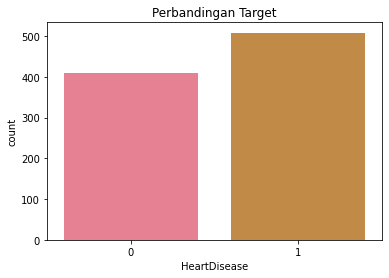

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("husl",9)

sns.countplot(df.HeartDisease)
plt.title("Perbandingan Target")
plt.show()

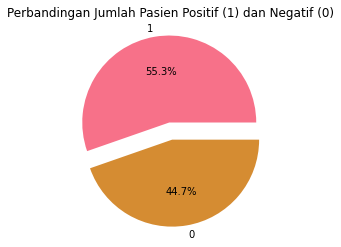

In [12]:
plt.pie(df.HeartDisease.value_counts().values,autopct='%1.1f%%',labels=df.HeartDisease.value_counts().keys(),explode= (0.1,0.1))
plt.title("Perbandingan Jumlah Pasien Positif (1) dan Negatif (0)")
plt.show()

Dapat kita lihat bahwa perbandingan kelas positif dan negatif pada dataset tidaklah berbeda jauh atau tidak imbalanced. Selanjutnya kita lihat perbandingan Hubungan variabel non-numerik dengan label

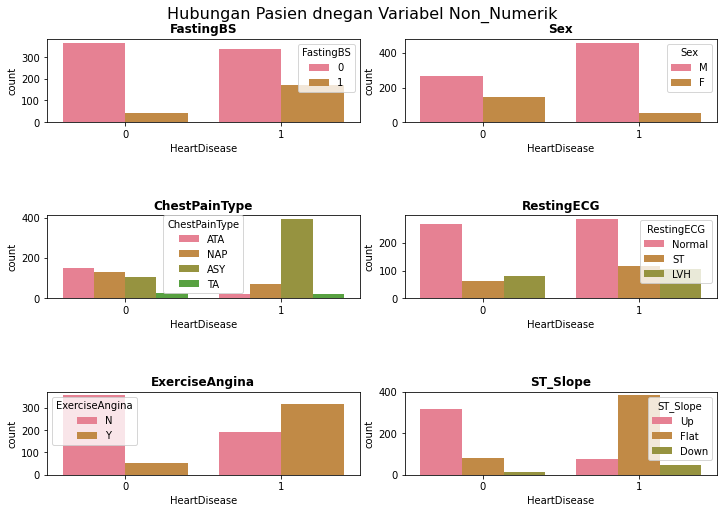

In [13]:
fig, axs = plt.subplots(3, 2, figsize=(10,7))
LIST_HUE = ["FastingBS"]
for col in df.columns:
  if df[col].dtypes=='object':
    LIST_HUE.append(col)

# LIST_HUE
fig.suptitle("Hubungan Pasien dnegan Variabel Non_Numerik",fontsize=16,y=1)
fig.subplots_adjust(top=0.3)

cnt= 0 
for i in range(3):
  for j in range(2):
    sns.countplot(ax=axs[i,j],data=df,x='HeartDisease',hue=LIST_HUE[cnt])
    axs[i,j].set_title(LIST_HUE[cnt],fontweight='bold')
    cnt+=1
    # if cnt==5:break
fig.tight_layout(pad=.5)
plt.show()

Dapat kita lihat dari grafik bahwa selain variabel RestingECG, semua variabel lainnya memiliki pengaruh terhadap label



-FastingBS = FastingBS (1) memiliki tingkat positif yang cukup tinggi daripada tingkat negatif pada label

-Sex = Sex(M) cenderung memiliki tingkat positif yang tinggi

-ChestPainType = (ASY) cenderung memiliki tingkat positif yang tinggi

-ExerciseAngina = (N) memiliki tingkat negatif yang tinggi sedangkan (Y) memiliki tingkat positif yang tinggi

-ST_Slope = (Up) memiliki tingkat negatif yang tinggi sedangkan (Flat) memiliki tingkat positif yang tinggi

In [14]:
LIST_CONT = []
for i in df.columns:
  if i not in set(LIST_HUE):
    LIST_CONT.append(i)
LIST_CONT

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

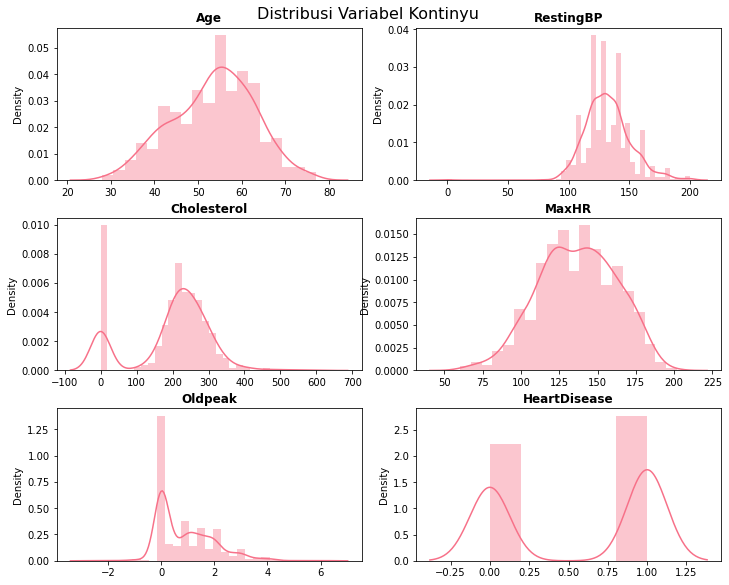

In [15]:
fig,axs= plt.subplots(3,2,figsize=(10,8))
fig.suptitle("Distribusi Variabel Kontinyu",fontsize=16,y=1)
fig.subplots_adjust(top=0.3)

cnt= 0 
for i in range(3):
  for j in range(2):
    sns.distplot(ax=axs[i,j],x=df[LIST_CONT[cnt]])
    axs[i,j].set_title(LIST_CONT[cnt],fontweight='bold')
    cnt+=1
    # if cnt==5:break
fig.tight_layout(pad=.5)
plt.show()

Dari grafik variabel-variabel tersebut, hampir semuanya bersifat normal distributed, namun terdapat beberapa kejanggalan, seperti nilai Cholesterol yang 0 hingga negatif, nilai RestingBP yang bernilai 0, dan Oldpeak yang bernilai negatif. Untuk kejanggalan tersebut akan ditangani nanti

In [16]:
df_filtered = df[df['Cholesterol'] > 0]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             746 non-null    int64  
 1   Sex             746 non-null    object 
 2   ChestPainType   746 non-null    object 
 3   RestingBP       746 non-null    int64  
 4   Cholesterol     746 non-null    int64  
 5   FastingBS       746 non-null    int64  
 6   RestingECG      746 non-null    object 
 7   MaxHR           746 non-null    int64  
 8   ExerciseAngina  746 non-null    object 
 9   Oldpeak         746 non-null    float64
 10  ST_Slope        746 non-null    object 
 11  HeartDisease    746 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 75.8+ KB


Disini, saya nanti akan menghilangkan data dengan variabel Cholesterol dibawah 0 karena memiliki banyak data dengan nilai tersebut

In [17]:
df['Oldpeak']=abs(df['Oldpeak'])

Disini, saya membuat nilai oldpeak yang negatif bernilai positif karena berdasarkan beberapa referensi yang saya baca jika nilai oldpeak negatif, kita tinggal membuatnya positif atau mengambil absolute valuenya.

Langkah Selanjutnya adalah menggunakan Label Encoder dan OneHotEncoder untuk mengganti nilai variabel non-numerik menjadi angka

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in LIST_HUE:
  df[i] = le.fit_transform(df[i])


Lalu disini saya akan memilih beberapa fitur yang nantinya akan digunakan untuk dimasukkan ke dalam model. Untuk menyeleksi fitur-fitur teresbut, saya menggunakan ChiSquare dimana jika nilai chisquare-nya bernilai rendah, maka kita akan membuang fitur tersebut.

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = df.loc[:,LIST_HUE]
target = df.loc[:,'HeartDisease']
best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)
featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

featureScores.sort_values(by='Chi Squared Score',ascending=False)

,Chi Squared Score
ChestPainType,160.736878
ExerciseAngina,133.640134
ST_Slope,77.486680
FastingBS,50.296983
Sex,18.006243
RestingECG,1.218136


DIsini dapat kita lihat bahwa RestingECG dan Sex bernilai rendah seperti yang kita lihat pada grafik tadi

Mengskaling data dengan StandardScaler

In [20]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['Oldpeak'] = ss.fit_transform(df[['Oldpeak']])
df['Age'] = ss.fit_transform(df[['Age']])
df['MaxHR'] = ss.fit_transform(df[['MaxHR']])    
                       
df['RestingBP'] = ss.fit_transform(df[['RestingBP']])
df['Cholesterol'] = ss.fit_transform(df[['Cholesterol']])

Untuk variabel kontinyu, kita akan menggunakan ANOVA untuk menyeleksi fitur mana yang akan kita gunakan

In [21]:
from sklearn.feature_selection import f_classif

features = df[LIST_CONT[:-1]]
target = df[LIST_CONT[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 
featureScores.sort_values(by='ANOVA Score',ascending=False)

,ANOVA Score
Oldpeak,207.390426
MaxHR,174.913585
Age,79.160779
Cholesterol,52.459725
RestingBP,10.727228


Disini kita lihat bahwa RestingBP bernilai sangat kecil , kita akan membuang variabel tersebut dan juga Cholesterol karena memiliki banyak observasi dibawah 0

In [22]:
df = df.drop(columns=['Cholesterol','RestingBP','RestingECG','Sex'])

In [23]:
df.head()

,Age,ChestPainType,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,0,1.382928,0,-0.878238,2,0
1,-0.478484,2,0,0.754157,0,0.081322,1,1
2,-1.751359,1,0,-1.525138,0,-0.878238,2,0
3,-0.584556,0,0,-1.132156,1,0.561102,1,1
4,0.051881,2,0,-0.581981,0,-0.878238,2,0


Disini saya membagi train set dengan porsi 80:20

In [24]:
from sklearn.model_selection import train_test_split

features = df[df.columns.drop(['HeartDisease'])].values
target = df['HeartDisease'].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 101)

Modelling , disini saya menggunakan XGBoost untuk model ML saya, XGBoost merupakan algoritma pohon yang dapat diskalakan 

In [25]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score

def modelfit(alg,X_train,y_train ,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train, label=y_train)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
        print("Using CV")
    
    alg.fit(X_train, y_train,eval_metric='auc')
        
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
        
    print ("\nModel Report")
    print ("Accuracy : {%.4g}" % accuracy_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): {%f}" % roc_auc_score(y_train, dtrain_predprob))
                    

In [27]:
clf = xgb.XGBClassifier()
modelfit(clf,x_train,y_train)

Using CV

Model Report
Accuracy : {0.876}
AUC Score (Train): {0.949446}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


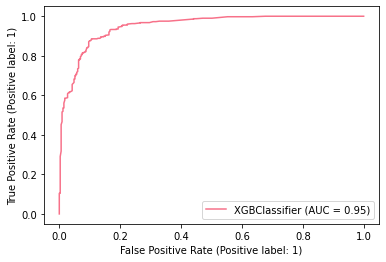

In [28]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(clf,x_train,y_train)

In [29]:
from sklearn.metrics import confusion_matrix

y_pred=clf.predict(x_test)

confusion_matrix(y_test,y_pred)

array([[63, 16],
       [15, 90]])

Setelah kita menggunakan XGBoost tanpa hyperparameter, kita akan mencoba tuning hyperparameternya untuk mengimprove akurasi dan roc/auc score kita

In [30]:
from sklearn.model_selection import GridSearchCV

params = {
        'learning_rate':[0.1,0.3,0.03],
        'n_estimators':[100,300,500],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [4,6,8]
        }
grid_search = GridSearchCV(estimator = xgb.XGBClassifier(objective= 'binary:logistic',seed=101), 
 param_grid = params, scoring='roc_auc',cv=5,verbose=3)

grid_search.fit(x_train,y_train)
grid_search.best_params_, grid_search.best_score_


Streaming output truncated to the last 5000 lines.
[CV 1/5] END colsample_bytree=0.8, gamma=5, learning_rate=0.03, max_depth=6, min_child_weight=10, n_estimators=500, subsample=1.0;, score=0.897 total time=   0.2s
[CV 2/5] END colsample_bytree=0.8, gamma=5, learning_rate=0.03, max_depth=6, min_child_weight=10, n_estimators=500, subsample=1.0;, score=0.913 total time=   0.2s
[CV 3/5] END colsample_bytree=0.8, gamma=5, learning_rate=0.03, max_depth=6, min_child_weight=10, n_estimators=500, subsample=1.0;, score=0.939 total time=   0.2s
[CV 4/5] END colsample_bytree=0.8, gamma=5, learning_rate=0.03, max_depth=6, min_child_weight=10, n_estimators=500, subsample=1.0;, score=0.912 total time=   0.2s
[CV 5/5] END colsample_bytree=0.8, gamma=5, learning_rate=0.03, max_depth=6, min_child_weight=10, n_estimators=500, subsample=1.0;, score=0.939 total time=   0.2s
[CV 1/5] END colsample_bytree=0.8, gamma=5, learning_rate=0.03, max_depth=8, min_child_weight=1, n_estimators=100, subsample=0.6;, sco

({'colsample_bytree': 0.6,
  'gamma': 2,
  'learning_rate': 0.1,
  'max_depth': 4,
  'min_child_weight': 1,
  'n_estimators': 100,
  'subsample': 1.0},
 0.9288419225421715)

In [31]:
clf_best = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    colsample_bytree=0.6,
    gamma=2,
    max_depth=4,
    min_child_eight=1,
    subsample=1.0
                         )
modelfit(clf_best,x_train,y_train)

Using CV

Model Report
Accuracy : {0.8965}
AUC Score (Train): {0.956729}


In [33]:
y_pred = clf_best.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[62, 17],
       [14, 91]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


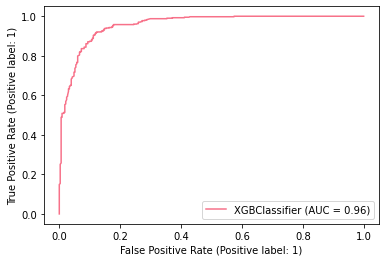

In [32]:
plot_roc_curve(clf_best,x_train,y_train)

Dapat kita lihat bahwa akurasi dan roc skor meningkat setelah kita melakukan hyperparameter tuning.